<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Projects_AIML_-/blob/main/MODULE2_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE 2 : Appreciating , interpreting and Visualizing Data

Project

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
uploaded1 = files.upload()

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

In [ ]:
data.shape
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


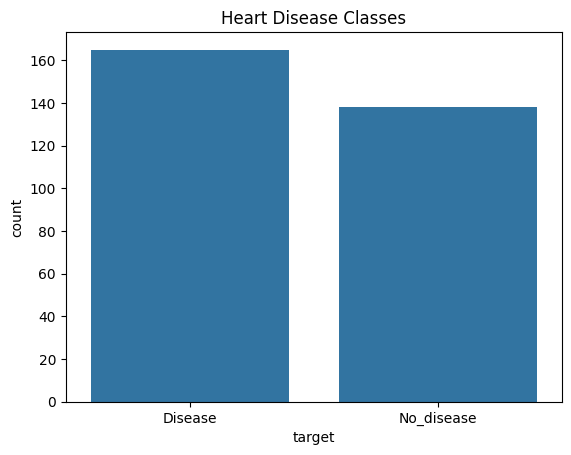

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

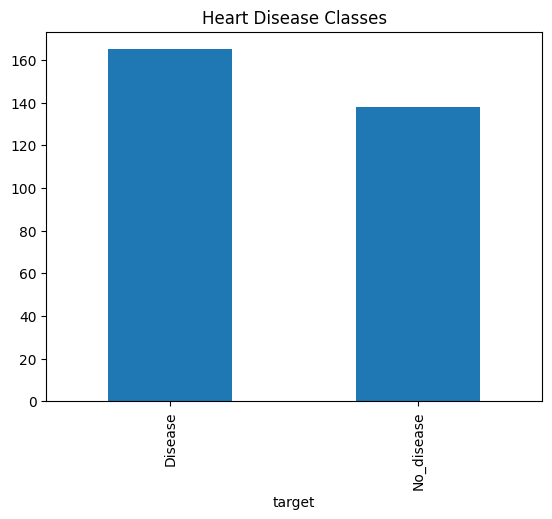

In [ ]:
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

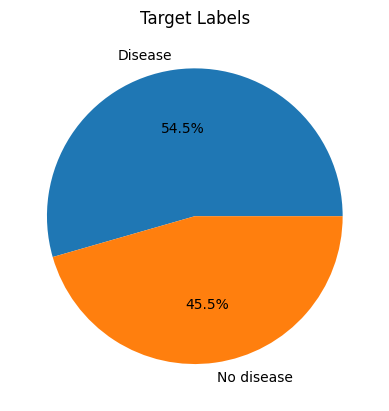

In [ ]:
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

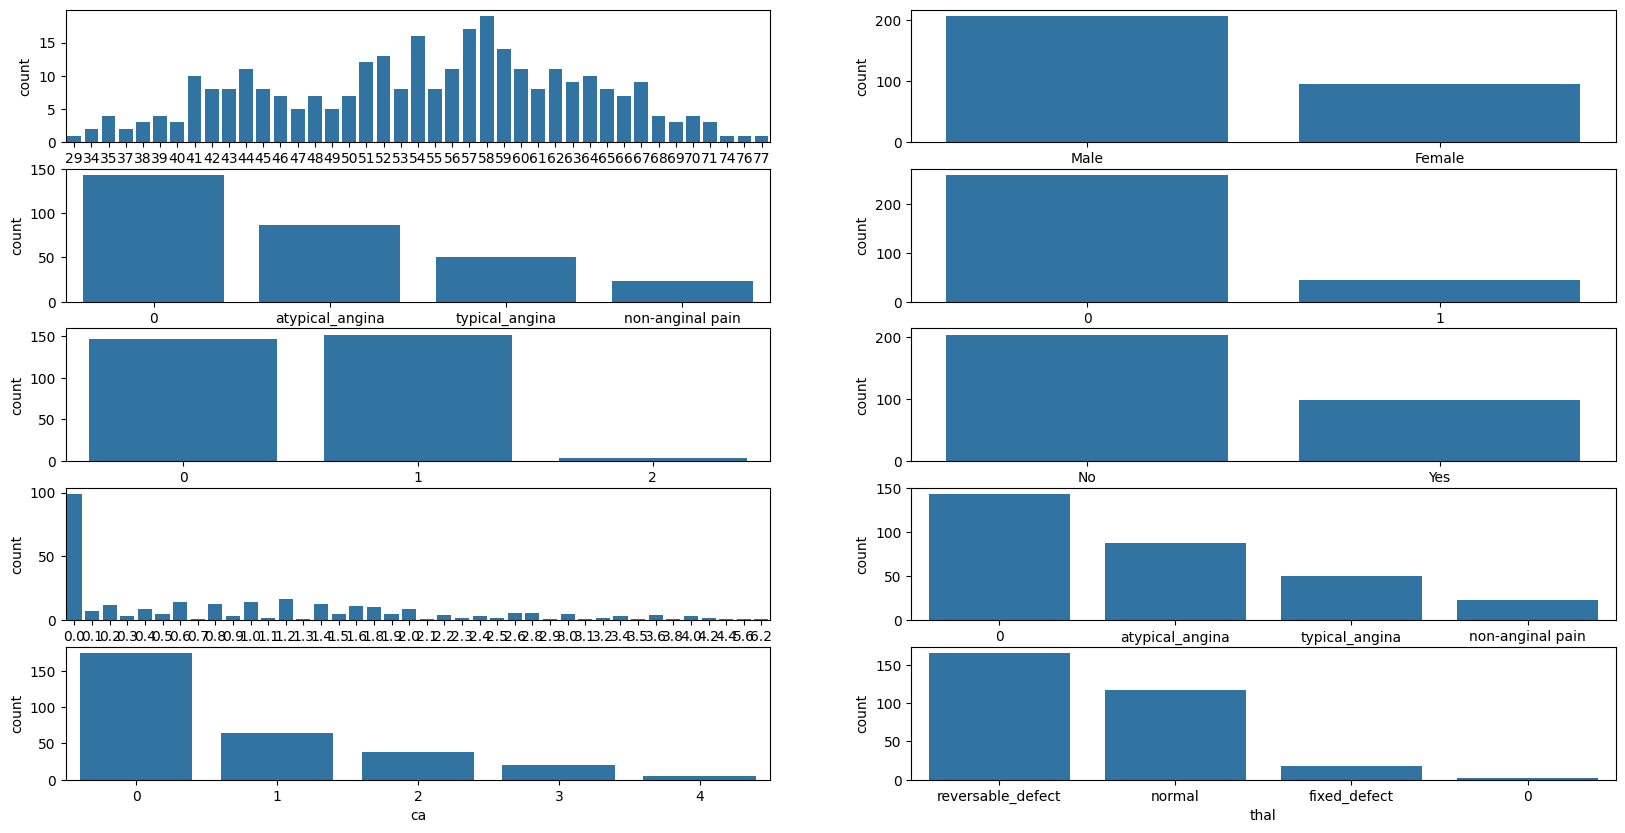

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,10))
cat_feat = ['age','sex', 'cp', 'fbs', 'restecg', 'exang','oldpeak', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/2), idx%2]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

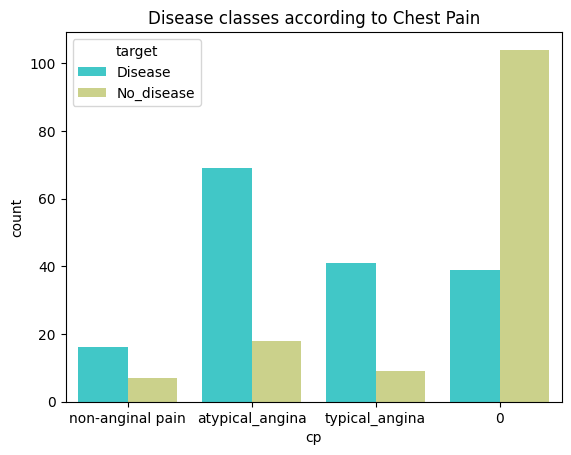

In [ ]:
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

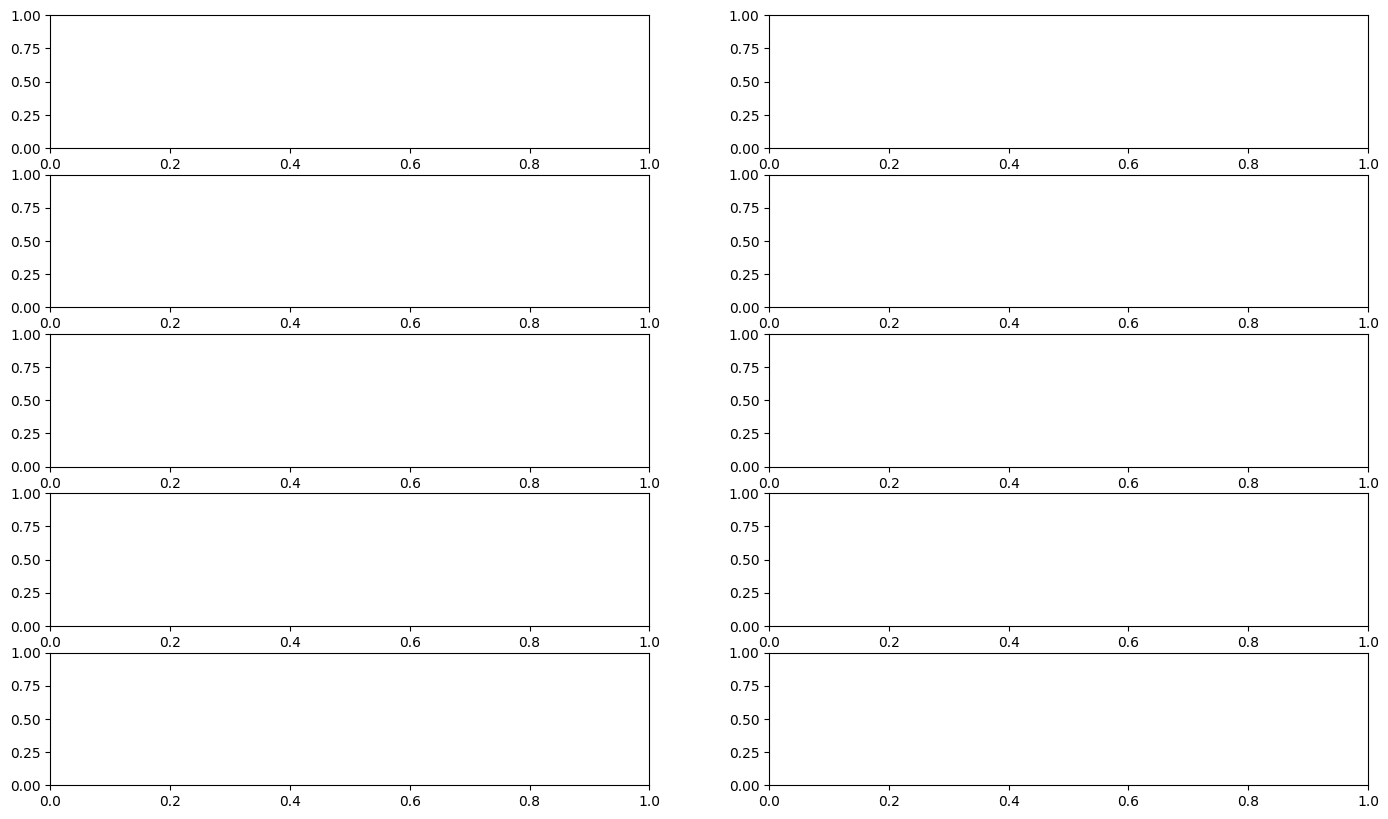

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/2), idx%2]

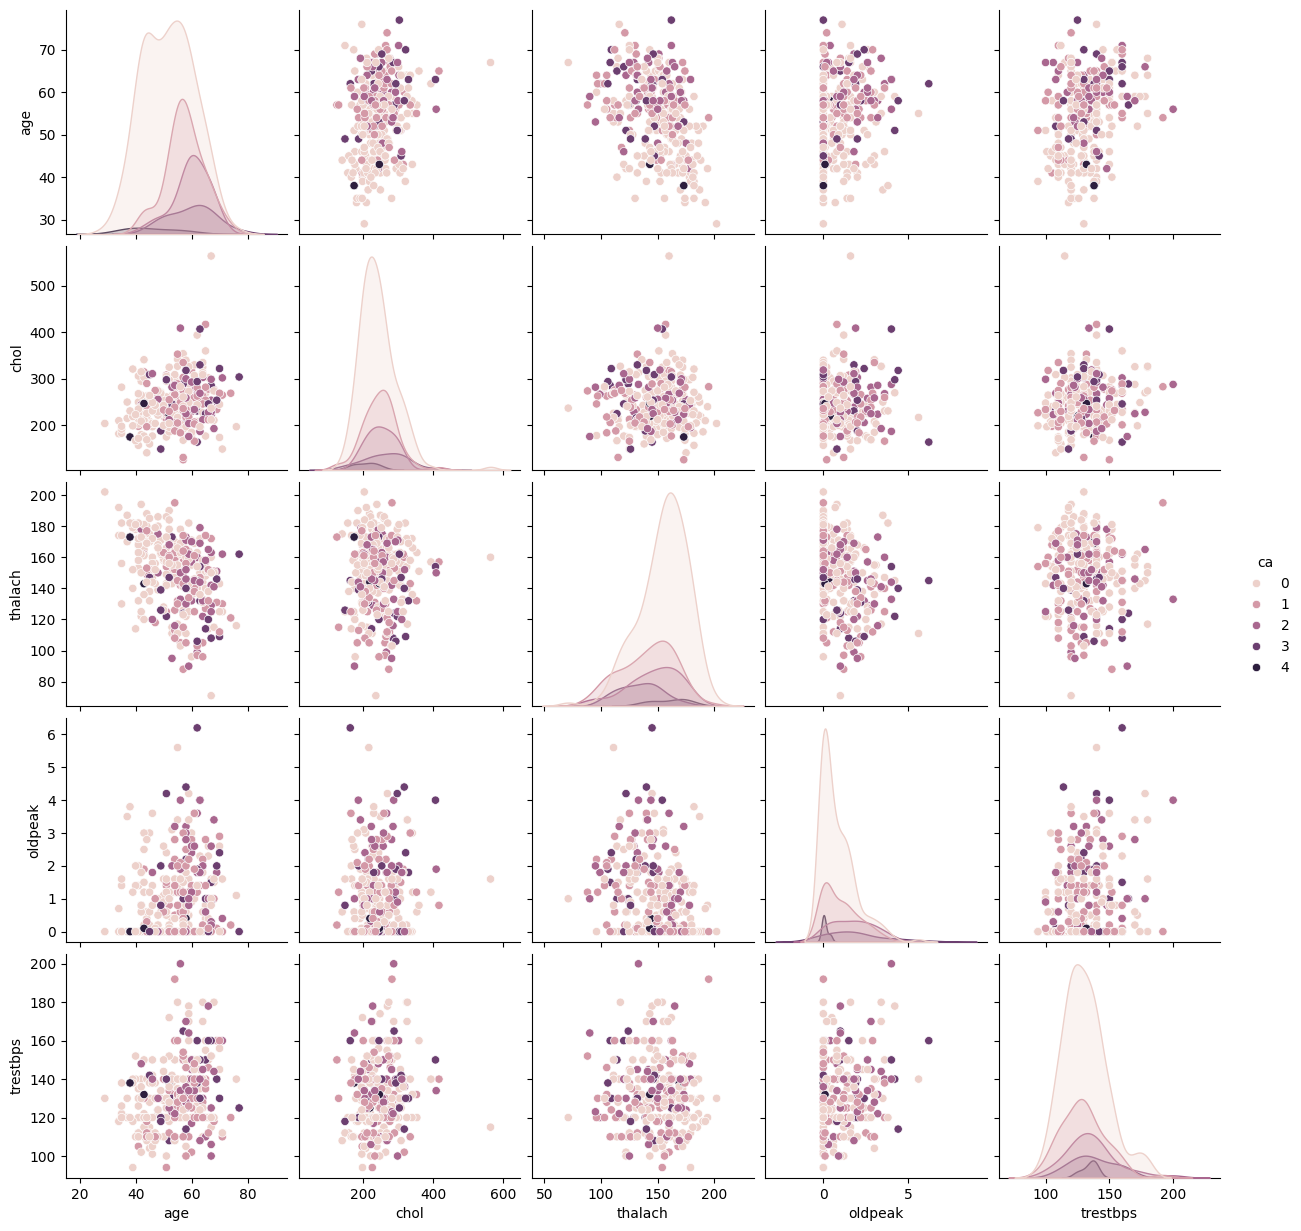

In [ ]:
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['ca']], hue='ca')

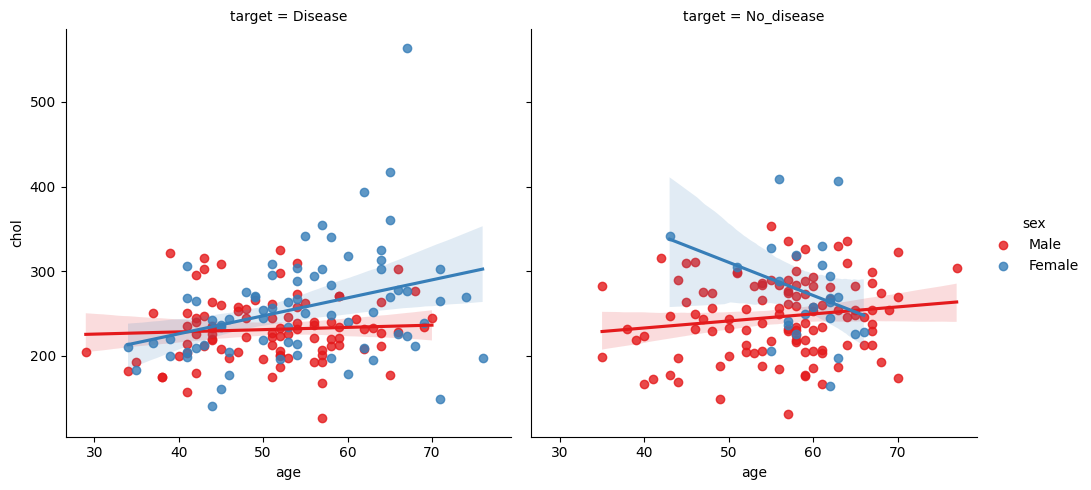

In [ ]:
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

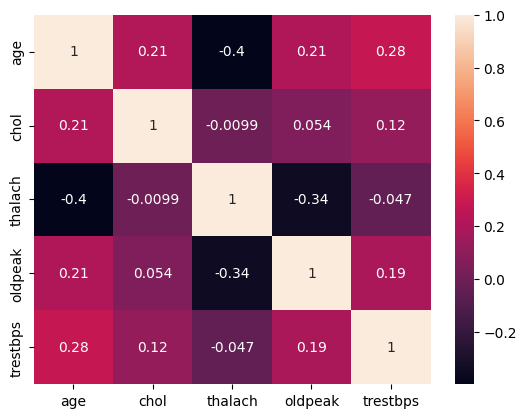

In [ ]:
numeric_data = data[continous_features]
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

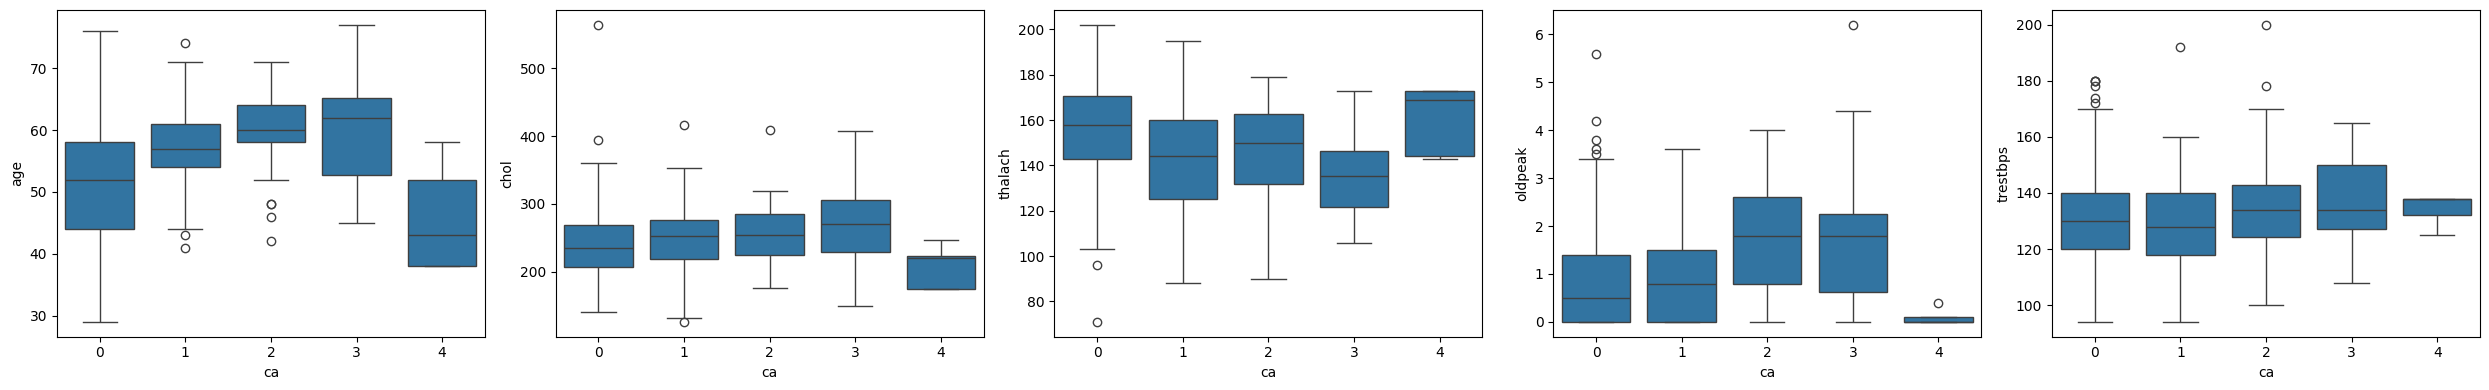

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='ca', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

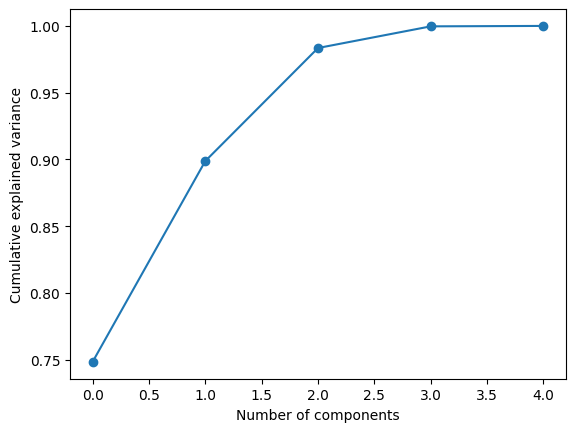

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

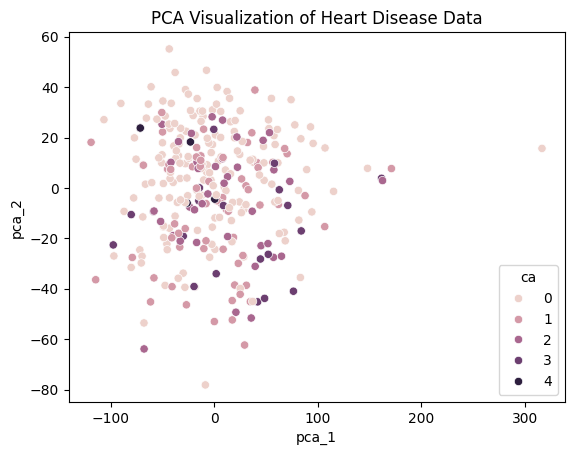

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "ca": data["ca"]
})
sns.scatterplot(x="pca_1", y="pca_2", hue="ca", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


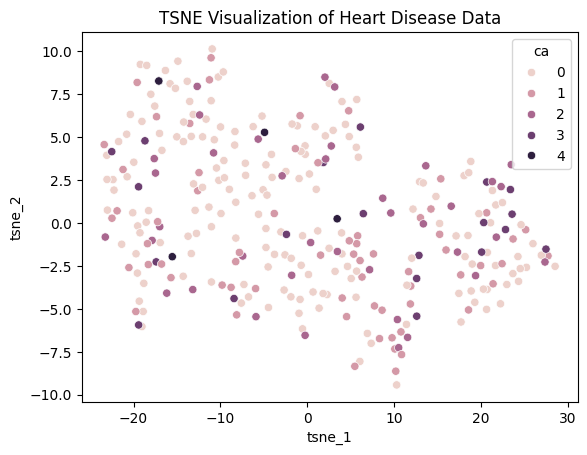

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "ca": data["ca"]
})

sns.scatterplot(x="tsne_1", y="tsne_2", hue="ca", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()

Based on the plots above, answer the following questions:

1.   What is the percentage of Samples with Disease?

From the pie chart or value counts plot, the percentage of samples with "Disease" can be calculated as:

Percentage=Number of Disease samples / Total samples x 100

2.   what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?

Statistical tests like t-tests or ANOVA should be conducted on the continuous features (age, chol, thalach, oldpeak, trestbps) to confirm significance.
  Based on visual pair plots and domain knowledge, likely candidates could include:
    1. thalach (maximum heart rate achieved): Clear differences are often seen between healthy and diseased samples.
    2. oldpeak (ST depression induced by exercise): Associated with heart strain and often higher in diseased individuals.
    3. chol (cholesterol levels): Elevated levels often indicate risk factors

3.  Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?

PCA Plot: Likely shows some separation, but PCA focuses on maximizing variance, not necessarily class separation. Classes may overlap due to non-linear relationships.
TSNE Plot: Designed to preserve local structure and is better for visualizing class separation. If distinct clusters are present, TSNE reflects clearer separation of presence/absence of disease

4.   What is the optimal number of principal components in our case?

The cumulative variance plot suggests the optimal number where cumulative explained variance exceeds 90%. For example, if the first 5 components explain 90% of the variance, 5 is optimal

5.   what are the continous features with the highest correation with each other?

Correlation can be calculated using data[continuous_features].corr().
Likely pairs:
trestbps and chol
thalach and age

In [ ]:
upload2=files.upload()

In [ ]:
data=pd.read_csv("star_nutri_expanded.csv")
data.head()

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())
data['Total Fat (g)'].unique()

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')
data.info()

In [ ]:
numeric_columns=data.select_dtypes(include=["int65","float65"]).columns
print(numeric_columns)

In [ ]:
data['Beverage_category'].unique()

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:
data = data.replace({True: 1, False: 0})
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))
data.head()

In [ ]:
data.info()

In [ ]:
# Generate pie chart for the 'Tea' column
tea_counts = data['Tea'].value_counts()
plt.pie(tea_counts, labels=tea_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Tea Types')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=["int64", "float64"])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA()
pca.fit(scaled_data)
plt.figure(figsize=(8, 6))
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker='o', linestyle='--', color='b'
)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(
    data=pca_data,
    columns=[f"PC{i+1}" for i in range(n_components)]
)
if n_components == 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="PC1", y="PC2", data=pca_df)
    plt.title("PCA Visualization with 2 Principal Components")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()
elif n_components >= 3:
    sns.pairplot(pca_df)
    plt.title("PCA Pair Plot with Multiple Components")
    plt.show()


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Perform TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(
    data=tsne_data,
    columns=["TSNE1", "TSNE2"]
)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TSNE1", y="TSNE2", data=tsne_df, s=50, color='blue')
plt.title("TSNE Visualization (First 2 Components)")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.grid()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Add a binary indicator for "Tea" vs. "Non-Tea" drinks
data['Is_Tea'] = data['Tea'].notnull().astype(int)

plt.figure(figsize=(15, 8))
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns
data_melted = data.melt(id_vars='Is_Tea', value_vars=numeric_columns)

sns.boxplot(x='variable', y='value', hue='Is_Tea', data=data_melted)
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns Grouped by Tea vs Non-Tea")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Is Tea (1=Yes, 0=No)")
plt.show()
